<a href="https://colab.research.google.com/github/Amit-Baviskar/Prodigy-InfoTech-Internship-Project-P-/blob/main/Prodigy_DA_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis in Python**





## **Problem Statement**


In today’s digital age, social media has become a critical platform where users express their opinions and emotions about various topics, brands, and events. Analyzing this vast data to uncover sentiment patterns presents a significant challenge due to its unstructured nature, rapid growth, and linguistic diversity.

Businesses and organizations often struggle to extract actionable insights from this data to understand public opinion, customer satisfaction, and brand perception effectively.

## **Introduction**

Sentiment analysis, also known as opinion mining, is a computational technique used to evaluate and categorize the emotional tone of textual data. It plays a pivotal role in understanding how people perceive products, services, events, or political developments. With social media platforms like Twitter, Facebook, and Instagram serving as hubs of public discourse, the ability to analyze sentiment patterns at scale offers unprecedented opportunities for businesses, policymakers, and researchers.

By leveraging **natural language processing (NLP)** and machine learning techniques, sentiment analysis can transform unstructured social media data into structured insights. These insights can help brands gauge customer satisfaction, refine marketing strategies, and monitor public sentiment during crises or major events.

## **Purpose**

The purpose of this project is to analyze and visualize sentiment patterns in social media data to gain a deeper understanding of public opinion and attitudes towards specific topics or brands. By identifying trends, key sentiment drivers, and user reactions, organizations can:

* **Enhance Decision-Making** : Support strategic business decisions based on customer feedback and public sentiment.

* **Improve Customer Engagement** : Tailor marketing campaigns to align with customer emotions and preferences.

* **Monitor Brand Reputation** : Track shifts in sentiment to identify and address potential risks to brand image.

* **Predict Trends** : Use historical sentiment patterns to anticipate future consumer behavior or market trends.

* **Support Crisis Management** : Quickly assess public sentiment during crises to inform communication strategies.


This project will utilize advanced data analysis and visualization tools to uncover actionable insights from social media data, empowering stakeholders to make informed decisions.

# **Step-by-Step Process for Sentiment Analysis on Social Media Data**

## **1. Import Required Libraries**

These libraries are used for data manipulation, sentiment analysis, and visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


**2. Data Collection and Preprocessing**

For this example, assume you are using a dataset of social media posts (such as tweets) in a CSV file.

In [ ]:
df_training.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df_training.columns = ['Id', 'ProductId', 'Reaction', 'Text']
df_training.columns = df_training.columns.str.strip()  # Remove leading/trailing spaces
df_training.head()

,Id,ProductId,Reaction,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:

# Display the shape and first few rows
print(df_training.shape)
print(df_training.head())

# Clean the data (remove missing values and duplicates)
df_training.dropna(inplace=True)
df_training.drop_duplicates(inplace=True)
df_training['Text'] = df_training['Text'].astype(str)





(71655, 4)
     Id    ProductId  Reaction  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


## **3. Quick Exploratory Data Analysis (EDA)**

Understand the distribution of sentiments in the dataset.

In [ ]:
# Show the value counts of sentiment reactions (positive, negative, neutral, irrelevant)
df_training['Reaction'].value_counts()

# Map sentiment reactions to numerical values for easier analysis
reaction_mapping = {'Negative': 1, 'Positive': 4, 'Neutral': 3, 'Irrelevant': 2}
df_training['Reaction_score'] = df_training['Reaction'].map(reaction_mapping)



<ipython-input-138-696c73eb02bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-138-696c73eb02bd>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)


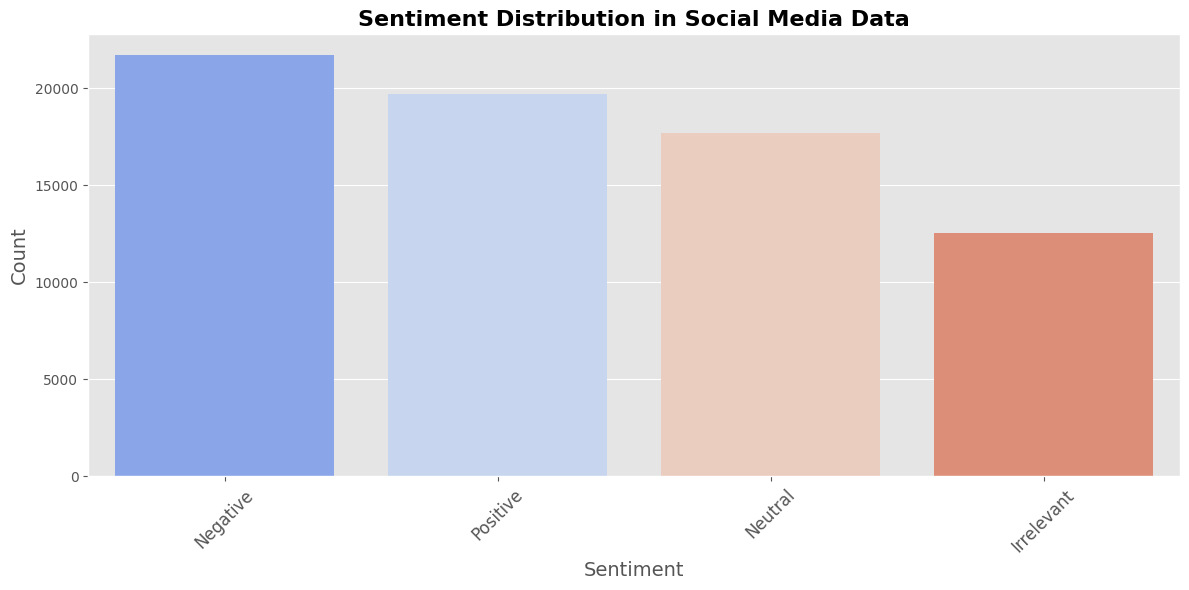

In [ ]:
# Plot the distribution of sentiment reactions
plt.figure(figsize=(12, 6))  # Adjust the figure size
ax = sns.barplot(
    x=df_training['Reaction'].value_counts().index,
    y=df_training['Reaction'].value_counts().values,
    palette="coolwarm"
)

# Set the title and labels
ax.set_title('Sentiment Distribution in Social Media Data', fontsize=16, fontweight='bold')
ax.set_xlabel('Sentiment', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Rotate the x-axis labels if necessary
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


## **4. Text Preprocessing (NLTK)**

Tokenize, remove stopwords, and apply stemming to prepare the text data for model training.

In [ ]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Initialize stopwords and PorterStemmer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Preprocess the text data (remove non-alphabetical characters, tokenize, remove stopwords, and apply stemming)
corpus = []
for i in range(len(df_training)):
    text = df_training['Text'].iloc[i]
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    text = [ps.stem(word) for word in text if word not in stop_words]
    corpus.append(' '.join(text))

# Display the cleaned corpus for the first entry
print(corpus[0:10])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['come border kill', 'im get borderland kill', 'im come borderland murder', 'im get borderland murder', 'im get borderland murder', 'spent hour make someth fun know huge borderland fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi wf jg', 'spent coupl hour someth fun know huge borderland fan maya one favorit charact decid make wallpap pc origin pictur compar creation made fun pic twitter com mlsi wf jg', 'spent hour someth fun know huge borderland fan maya one favorit charact', 'spent hour make someth fun know huge rhandlerr fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi wf jg', 'spent hour make someth fun know huge rhandlerr fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi wf jg']


## **5. Text Vectorization**

Convert the text data into a numerical format using CountVectorizer.

In [ ]:
# Convert text data into numerical format using CountVectorizer
cv = CountVectorizer(max_features=1000, stop_words='english')
X = cv.fit_transform(corpus).toarray()  # Feature matrix
y = df_training['Reaction_score'].values  # Target variable (sentiment score)


## **6. Train-Test Split**

Split the data into training and testing sets.

In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)


## **7. Model Training (Naive Bayes)**

Train a Naive Bayes classifier to predict sentiment.

In [ ]:
# Initialize the Naive Bayes classifier
classifier = GaussianNB()

# Fit the classifier on the training data
classifier.fit(X_train, y_train)


GaussianNB()

## **8. Model Evaluation**

Evaluate the performance of the model on the test data.

In [ ]:
# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {round(accuracy * 100, 2)}%')


Confusion Matrix:
[[1738 1824  282  556]
 [ 145 1964   99  247]
 [ 363 1619  945  629]
 [ 258 1816  228 1618]]
Accuracy Score: 43.72%


## **9. Visualizing Sentiment Patterns**

Visualize the sentiment distribution, confusion matrix, and key patterns.



### **A) Sentiment Distribution:**

<ipython-input-136-3a2fff9b75f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reaction', data=df_training, palette='coolwarm')


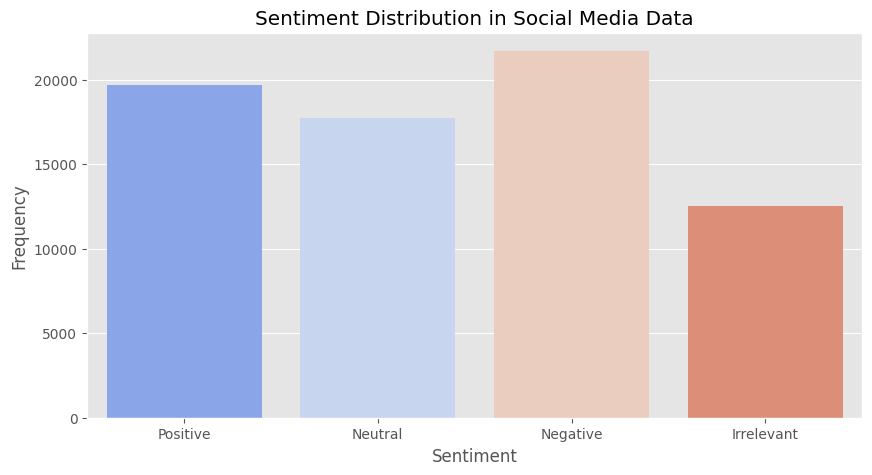

In [ ]:
# Visualize the distribution of sentiment reactions in the dataset
plt.figure(figsize=(10, 5))
sns.countplot(x='Reaction', data=df_training, palette='coolwarm')
plt.title('Sentiment Distribution in Social Media Data')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


### **B) Confusion Matrix:**

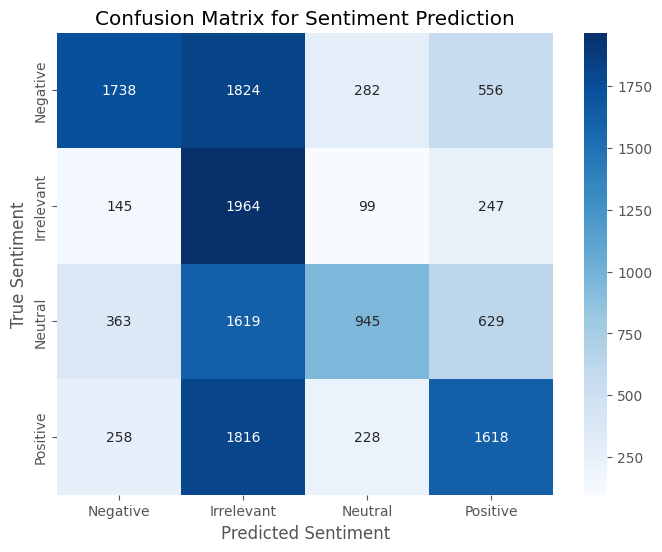

In [ ]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Irrelevant', 'Neutral', 'Positive'], yticklabels=['Negative', 'Irrelevant', 'Neutral', 'Positive'])
plt.title('Confusion Matrix for Sentiment Prediction')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.show()


## **10. Insights and Conclusion**

By analyzing and visualizing the sentiment patterns, we can gain several insights:

* **Public Opinion Trends** : The distribution of sentiments (positive, negative, neutral, irrelevant) provides a sense of the general public's opinion about a brand, product, or topic.
* **Brand Perception** : A high proportion of negative or neutral sentiments may indicate dissatisfaction, which can prompt further investigation into customer concerns.
* **Campaign Impact** : Changes in sentiment over time can highlight the effectiveness of marketing campaigns, product launches, or public relations events.


By leveraging the Naive Bayes model, you can efficiently classify large volumes of social media posts, and the visualization tools help convey the patterns in an easily interpretable manner for decision-making.